In [1]:
# Import Data Modules, Plotting Modules, and Stats/Regressions Packages
import numpy as np
import scipy.stats as stats
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
from sklearn import linear_model
from sklearn.metrics import mean_squared_error
from sklearn import decomposition
from sklearn.decomposition import PCA
from matplotlib.mlab import PCA
from scipy.misc import lena
from scipy.stats import mode
from sklearn.preprocessing import StandardScaler
from sklearn.cross_validation import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.cross_validation import cross_val_score
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import Ridge, Lasso, ElasticNet, RidgeCV, LassoCV, ElasticNetCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm

%matplotlib inline
%config InlineBackend.figure_format ='retina'

In [2]:
# Upload the Date Set
df = pd.read_csv('/home/dsi-student/Desktop/ECON628-01-RPanlilio/refugeedata2.csv')

In [3]:
# Head of Data Set
df.head()

,age,sex,goo,doo,soo,doa,famsize,bro,sis,sib,...,_demeanptsd1_nm,_id,_n1,_nn,_pdif,psetc,b1etc,psrei,b1rei,comsup
0,12,male,Syria,NaN,NaN,2013,7,3.0,2.0,NaN,...,NaN,234,NaN,0.0,NaN,0.627690,4.0,0.430279,3.0,1
1,12,male,NaN,NaN,NaN,2013,7,NaN,NaN,NaN,...,NaN,48,NaN,0.0,NaN,0.296827,2.0,0.539266,4.0,1
2,12,female,NaN,NaN,NaN,2012,10,3.0,4.0,7.0,...,NaN,224,NaN,0.0,NaN,0.606842,4.0,0.248817,2.0,1
3,5,female,NaN,NaN,NaN,2013,5,1.0,2.0,NaN,...,NaN,296,NaN,0.0,NaN,0.892124,5.0,0.441027,3.0,1
4,9,female,Syria,NaN,NaN,2013,7,NaN,5.0,NaN,...,NaN,161,NaN,0.0,NaN,0.471024,3.0,0.478241,3.0,1


In [4]:
# Tail of Data Set
df.tail()

,age,sex,goo,doo,soo,doa,famsize,bro,sis,sib,...,_demeanptsd1_nm,_id,_n1,_nn,_pdif,psetc,b1etc,psrei,b1rei,comsup
1226,7,female,Daraa,NaN,NaN,2012,8,1.0,5.0,NaN,...,-0.287096,575,279.0,1.0,0.001656,0.775553,4.0,0.319793,2.0,1
1227,7,female,Daraa,NaN,NaN,2013,15,NaN,NaN,NaN,...,-0.287096,303,10.0,1.0,0.000075,0.105534,1.0,0.402993,3.0,1
1228,8,female,Daraa,As-Sanamayn,As-Sanamayn,2013,6,2.0,2.0,NaN,...,NaN,1231,NaN,NaN,NaN,NaN,NaN,0.133858,1.0,1
1229,9,male,Damascus,NaN,NaN,2014,7,NaN,NaN,NaN,...,-0.287096,462,236.0,1.0,0.002051,0.645564,4.0,0.531874,4.0,1
1230,6,female,Daraa,NaN,NaN,2013,6,1.0,2.0,NaN,...,-0.248914,654,291.0,1.0,0.000000,0.852473,5.0,0.417184,3.0,1


In [5]:
# Description of Data Set
df.describe()

/home/dsi-student/.conda/envs/econ/lib/python2.7/site-packages/numpy/lib/function_base.py:3834: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


,age,doa,famsize,bro,sis,sib,ref,rei,res,gov,...,_demeanptsd1_nm,_id,_n1,_nn,_pdif,psetc,b1etc,psrei,b1rei,comsup
count,1231.000000,1231.000000,1231.000000,949.000000,942.000000,154.000000,1231.000000,1231.000000,1231.0,0.0,...,834.000000,1231.000000,834.000000,1136.000000,834.000000,1136.000000,1127.000000,1231.000000,1229.000000,1231.000000
mean,8.763607,2012.989439,6.981316,2.582719,2.495754,4.603896,0.574330,0.425670,0.0,NaN,...,-0.334816,616.000000,265.035971,0.734155,0.002857,0.734528,4.437445,0.426137,2.895850,0.998375
std,1.992304,0.646983,1.908596,1.484362,1.480831,1.981677,0.494645,0.494645,0.0,NaN,...,0.578024,355.503399,64.847581,0.441977,0.003995,0.260384,1.523452,0.115255,0.968842,0.040291
min,5.000000,2010.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,NaN,...,-0.799984,1.000000,10.000000,0.000000,0.000000,0.063346,1.000000,0.068477,1.000000,0.000000
25%,7.000000,2013.000000,6.000000,NaN,NaN,NaN,0.000000,0.000000,0.0,NaN,...,NaN,308.500000,NaN,NaN,NaN,NaN,NaN,0.359398,NaN,1.000000
50%,9.000000,2013.000000,7.000000,NaN,NaN,NaN,1.000000,0.000000,0.0,NaN,...,NaN,616.000000,NaN,NaN,NaN,NaN,NaN,0.438719,NaN,1.000000
75%,10.000000,2013.000000,8.000000,NaN,NaN,NaN,1.000000,1.000000,0.0,NaN,...,NaN,923.500000,NaN,NaN,NaN,NaN,NaN,0.503733,NaN,1.000000
max,12.000000,2016.000000,16.000000,13.000000,8.000000,12.000000,1.000000,1.000000,0.0,NaN,...,2.854961,1231.000000,302.000000,1.000000,0.024843,0.999989,6.000000,0.734952,5.000000,1.000000


In [6]:
# Data Types of Data Set
df.dtypes

age                        int64
sex                       object
goo                       object
doo                       object
soo                       object
doa                        int64
famsize                    int64
bro                      float64
sis                      float64
sib                      float64
po                        object
ind                       object
ref                        int64
rei                        int64
res                        int64
dis                       object
gov                      float64
cit                       object
hfd                      float64
ffd                      float64
ad1                      float64
ad2                      float64
ad3                      float64
ad4                      float64
ad5                      float64
adp                      float64
a1                         int64
a2                         int64
a3                       float64
d1                       float64
          

In [7]:
# Info of Data Set
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1231 entries, 0 to 1230
Columns: 145 entries, age to comsup
dtypes: float64(103), int64(31), object(11)
memory usage: 1.4+ MB


In [8]:
# Correlation of Data Set
df.corr()

,age,doa,famsize,bro,sis,sib,ref,rei,res,gov,...,_demeanptsd1_nm,_id,_n1,_nn,_pdif,psetc,b1etc,psrei,b1rei,comsup
age,1.000000,-0.138177,0.173947,0.149712,0.115062,0.327737,0.058681,-0.058681,NaN,NaN,...,0.093183,-0.138758,-0.114608,-0.092536,-0.012840,-0.158155,-0.158881,-0.251929,-0.295305,0.005340
doa,-0.138177,1.000000,0.011691,0.040146,0.036446,0.113242,-0.082650,0.082650,NaN,NaN,...,-0.098695,0.107138,0.053069,0.046836,-0.026902,0.067367,0.091419,0.350396,0.347716,-0.125412
famsize,0.173947,0.011691,1.000000,0.548113,0.583901,0.941214,0.032905,-0.032905,NaN,NaN,...,0.011479,-0.284514,-0.233918,-0.198414,0.036929,-0.333304,-0.276285,-0.140410,-0.150702,0.010177
bro,0.149712,0.040146,0.548113,1.000000,-0.083443,0.642661,0.003482,-0.003482,NaN,NaN,...,0.025694,-0.171905,-0.154310,-0.159485,0.087690,-0.231518,-0.199441,-0.004143,-0.007933,0.002562
sis,0.115062,0.036446,0.583901,-0.083443,1.000000,0.763225,0.125618,-0.125618,NaN,NaN,...,0.003610,-0.121538,-0.080212,-0.053124,-0.000402,-0.104476,-0.078058,-0.135115,-0.159085,-0.011106
sib,0.327737,0.113242,0.941214,0.642661,0.763225,1.000000,0.467750,-0.467750,NaN,NaN,...,-0.016745,-0.525930,-0.334969,-0.533307,-0.201165,-0.611889,-0.605029,-0.094441,-0.036816,-0.016212
ref,0.058681,-0.082650,0.032905,0.003482,0.125618,0.467750,1.000000,-1.000000,NaN,NaN,...,0.006900,0.125261,0.016794,0.125126,0.041467,0.073686,0.081914,-0.240057,-0.257507,-0.034729
rei,-0.058681,0.082650,-0.032905,-0.003482,-0.125618,-0.467750,-1.000000,1.000000,NaN,NaN,...,-0.006900,-0.125261,-0.016794,-0.125126,-0.041467,-0.073686,-0.081914,0.240057,0.257507,0.034729
res,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
gov,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


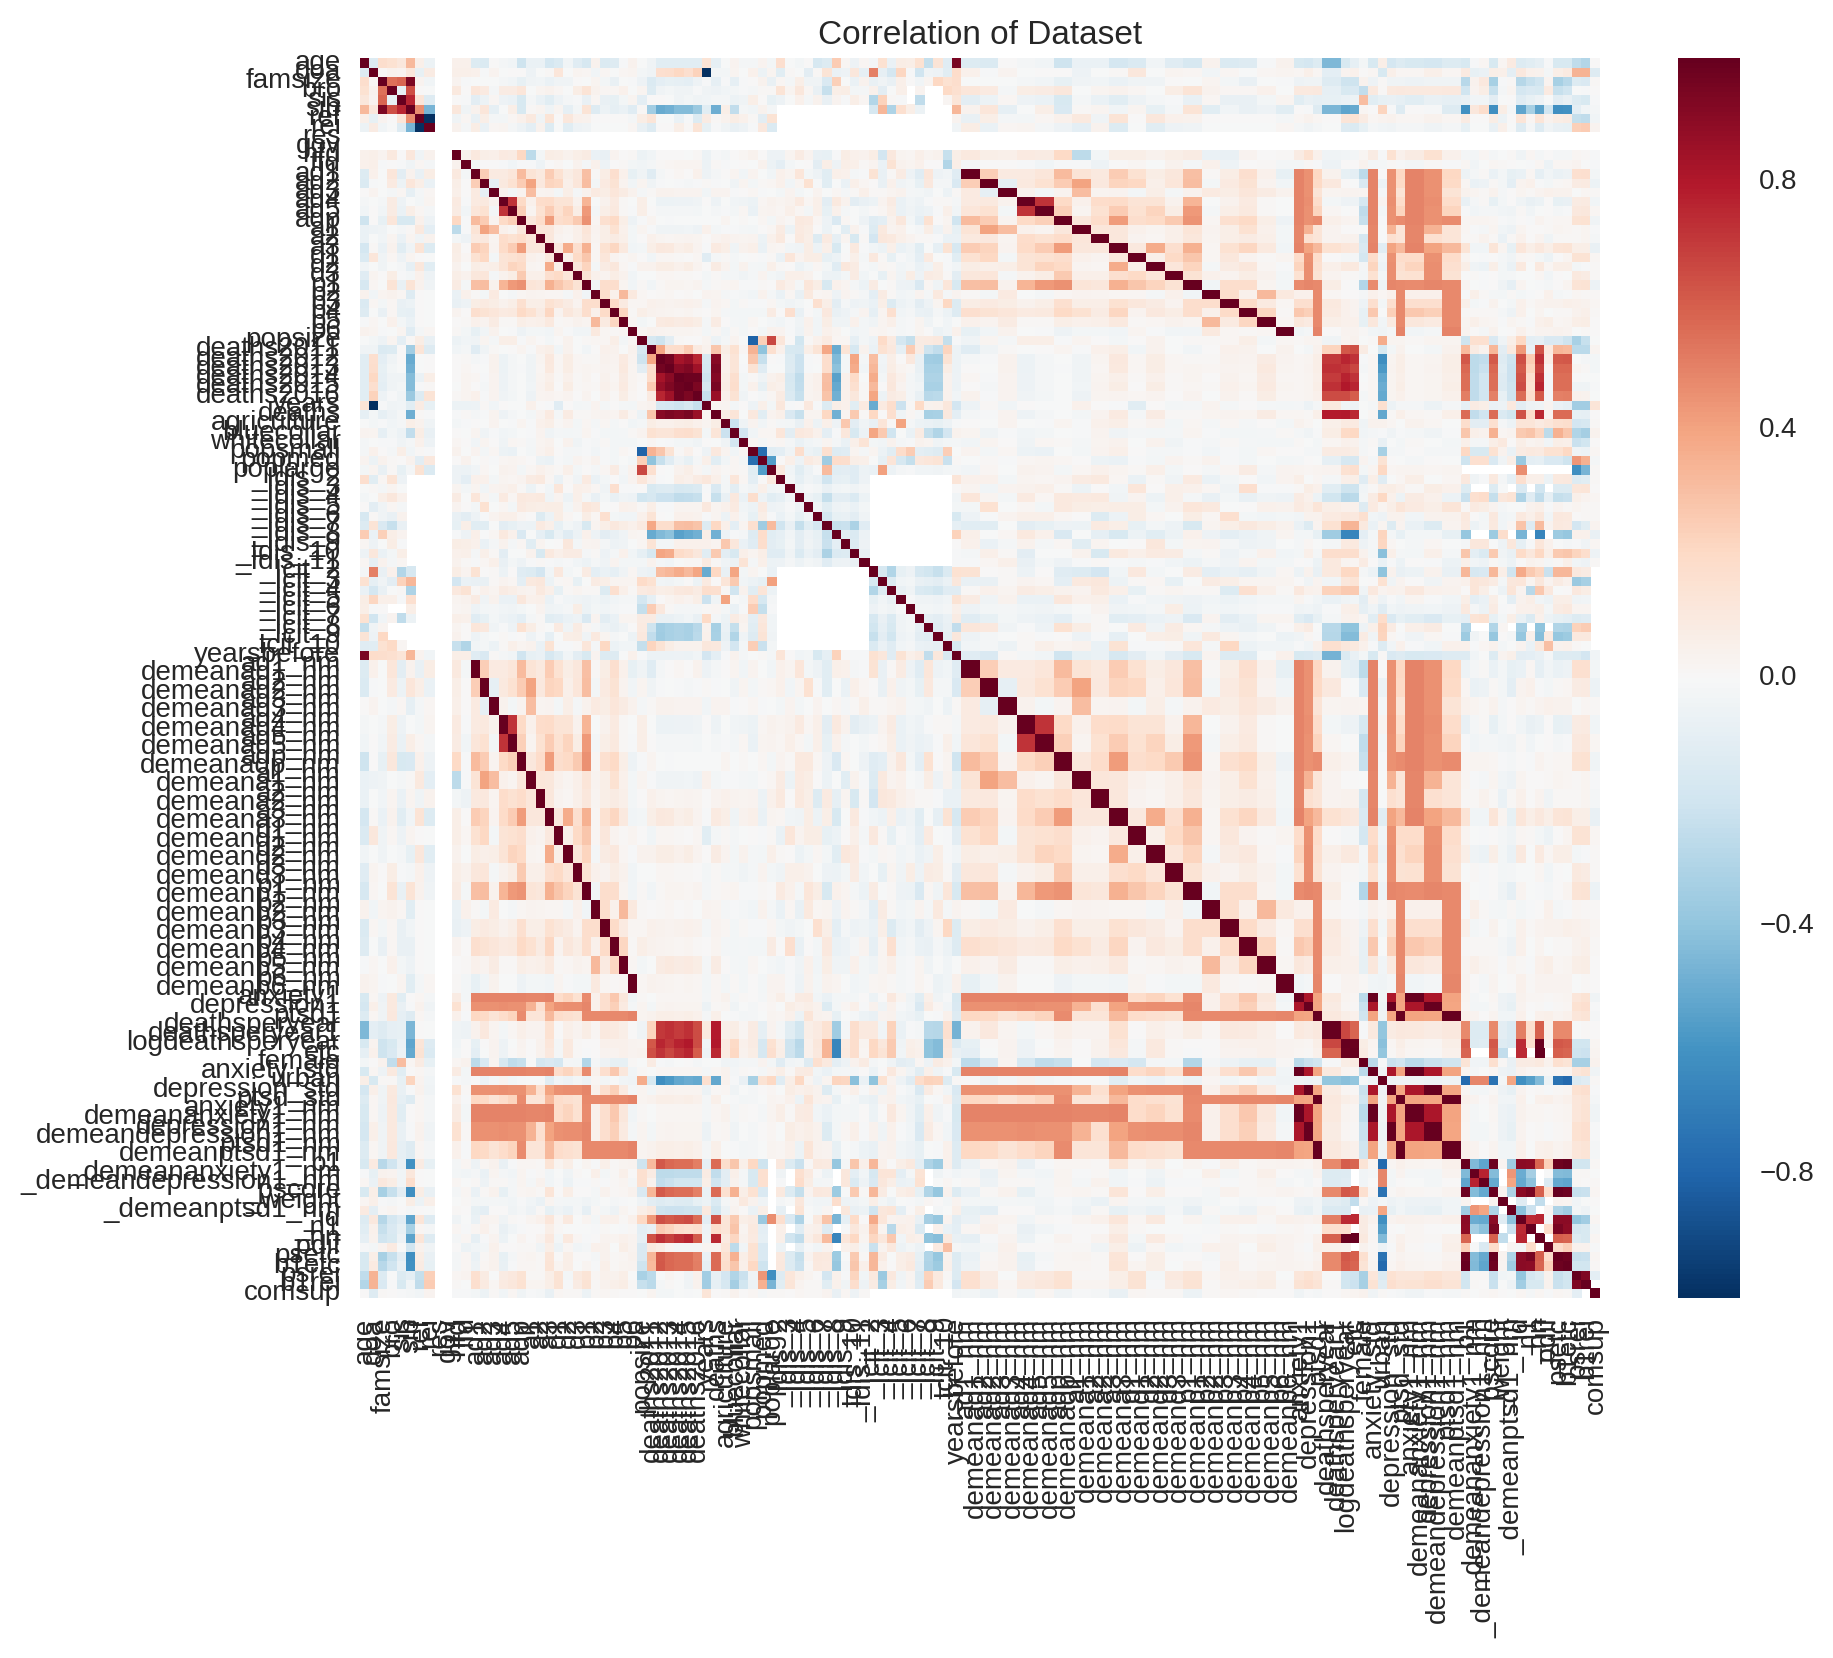

In [9]:
# Correlation Heat Map of Dataset
df.corr()
fig = plt.figure(figsize=(10,8))
ax = fig.gca()
ax.set_title('Correlation of Dataset')
sns.heatmap(df.corr(), ax=ax)
plt.show()

In [10]:
# Checking for Null/Missing Values
df.isnull().sum(axis=0)

age                         0
sex                         0
goo                       197
doo                       898
soo                       845
doa                         0
famsize                     0
bro                       282
sis                       289
sib                      1077
po                        281
ind                         0
ref                         0
rei                         0
res                         0
dis                       524
gov                      1231
cit                       826
hfd                         1
ffd                         1
ad1                         5
ad2                         5
ad3                         5
ad4                         7
ad5                         5
adp                         5
a1                          0
a2                          0
a3                          5
d1                          5
                         ... 
logdeathsperyear            0
etc                         0
female    

In [11]:
# Data Cleaning
# Replacing Null with Mean
df.ad1 = df.ad1.fillna(np.mean(df.ad1))
df.ad2 = df.ad2.fillna(np.mean(df.ad2))
df.ad3 = df.ad3.fillna(np.mean(df.ad3))
df.ad4 = df.ad4.fillna(np.mean(df.ad4))
df.ad5 = df.ad5.fillna(np.mean(df.ad5))
df.adp = df.adp.fillna(np.mean(df.adp))
df.a1 = df.a1.fillna(np.mean(df.a1))
df.a2 = df.a2.fillna(np.mean(df.a2))
df.a3 = df.a3.fillna(np.mean(df.a3))
df.d1 = df.d1.fillna(np.mean(df.d1))
df.d2 = df.d2.fillna(np.mean(df.d2))
df.d3 = df.d3.fillna(np.mean(df.d3))
df.p1 = df.p1.fillna(np.mean(df.p1))
df.p2 = df.p2.fillna(np.mean(df.p2))
df.p3 = df.p3.fillna(np.mean(df.p3))
df.p4 = df.p4.fillna(np.mean(df.p4))
df.p5 = df.p5.fillna(np.mean(df.p5))
df.p6 = df.p6.fillna(np.mean(df.p6))

In [12]:
# Method 2 

In [12]:
# Separate into Subsets for Anxiety, Depression, and PTSD
df_anxiety = df[['ad1', 'ad2', 'ad3', 'ad4', 'ad5', 'adp', 'a1', 'a2', 'a3']]
df_depression = df[['ad1', 'ad2', 'ad3', 'ad4', 'ad5', 'adp', 'd1', 'd2', 'd3']]
df_ptsd = df[['adp', 'p1', 'p2', 'p3', 'p4', 'p5', 'p6']]

# Normalizing Psychological Indicators
df_anxiety_norm = (df_anxiety - df_anxiety.mean()) / df_anxiety.std()
df_depression_norm = (df_depression - df_depression.mean()) / df_depression.std()
df_ptsd_norm = (df_ptsd - df_ptsd.mean()) / df_ptsd.std()

# Performing PCA to reduce dimensionality
pca = decomposition.PCA()
pca.n_components = 1
anxiety = pca.fit_transform(df_anxiety_norm)
depression = pca.fit_transform(df_depression_norm)
ptsd = pca.fit_transform(df_ptsd_norm)

# Grouping Psychological Indicators with Reduced Dimensionality
anx = pd.DataFrame(anxiety)
dep = pd.DataFrame(depression)
ptsd = pd.DataFrame(ptsd) 
df_run = pd.concat([df.ref, anx, dep, ptsd], axis=1, join='inner')
df_run.columns = ['Refugee', 'Anxiety', 'Depression', 'PTSD']

In [ ]:
# Method 1

In [4]:
# Normalizing Psychological Indicators
df_indicators = df[['ad1', 'ad2', 'ad3', 'ad4', 'ad5', 'adp', 'a1', 'a2', 'a3', 'd1', 'd2', 'd3', 'p1', 'p2', 'p3', 'p4', 'p5', 'p6']]
df_norm = (df_indicators - df_indicators.mean()) / df_indicators.std()

# Grouping Psychological Indicators into Anxiety, Depression, and PTSD
df_anxiety = df_norm[['ad1', 'ad2', 'ad3', 'ad4', 'ad5', 'adp', 'a1', 'a2', 'a3']]
df_depression = df_norm[['ad1', 'ad2', 'ad3', 'ad4', 'ad5', 'adp', 'd1', 'd2', 'd3']]
df_ptsd = df_norm[['adp', 'p1', 'p2', 'p3', 'p4', 'p5', 'p6']]

# Performing PCA to reduce dimensionality
pca = decomposition.PCA()
pca.n_components = 1
anxiety = pca.fit_transform(df_anxiety)
depression = pca.fit_transform(df_depression)
ptsd = pca.fit_transform(df_ptsd)

# Grouping Psychological Indicators with Reduced Dimensionality
anx = pd.DataFrame(anxiety)
dep = pd.DataFrame(depression)
ptsd = pd.DataFrame(ptsd) 
df_run = pd.concat([df.ref, anx, dep, ptsd], axis=1, join='inner')
df_run.columns = ['Refugee', 'Anxiety', 'Depression', 'PTSD']

In [13]:
df['Anxiety'] = df_run.Anxiety
df['Depression'] = df_run.Depression
df['PTSD'] = df_run.PTSD

In [14]:
# Data Cleaning
df.loc[df.sex == 'male', 'sex'] = 0
df.loc[df.sex == 'female', 'sex'] = 1
df['years'] = 2016 - df.doa

# Set y and x Variables

In [16]:
# Anxiety Variables
y_anxiety = df.Anxiety.values
col = ['age', 'sex', 'famsize', 'urban', 'popmed', 'poplarge', 'agriculture', 'bluecollar', 'whitecollar', 'rei', 'etc']
x_anxiety = df[[i for i in col]]
print y_anxiety.shape, x_anxiety.shape

# Depression Variables
y_depression = df.Depression.values
col = ['age', 'sex', 'famsize', 'urban', 'popmed', 'poplarge', 'agriculture', 'bluecollar', 'whitecollar', 'rei', 'etc']
x_depression = df[[i for i in col]]
print y_depression.shape, x_depression.shape

# PTSD Variables
y_ptsd = df.PTSD.values
col = ['age', 'sex', 'famsize', 'urban', 'popmed', 'poplarge', 'agriculture', 'bluecollar', 'whitecollar', 'rei', 'etc']
x_ptsd = df[[i for i in col]]
print y_ptsd.shape, x_ptsd.shape


(1231,) (1231, 11)
(1231,) (1231, 11)
(1231,) (1231, 11)


In [18]:
ss = StandardScaler() 

# Standardizing the Anxiety Data
xn_anxiety = ss.fit_transform(x_anxiety)
xn_anxiety.shape

# Creating Train and Test DataSets
x_anxiety_train, x_anxiety_test, y_anxiety_train, y_anxiety_test = train_test_split(xn_anxiety, y_anxiety, test_size=0.3, random_state=10)
print 'Shape of X_anxiety_train is: ', x_anxiety_train.shape
print 'Shape of y_anxiety_train is: ', y_anxiety_train.shape 
print "\n======\n"
print 'Shape of X_anxiety_test is: ', x_anxiety_test.shape
print 'Shape of y_anxiety_test is: ', y_anxiety_test.shape
print "\n======\n"

# Standardizing the Depression Data
xn_depression = ss.fit_transform(x_depression)
xn_depression.shape

# Creating Train and Test DataSets
x_depression_train, x_depression_test, y_depression_train, y_depression_test = train_test_split(xn_depression, y_depression, test_size=0.3, random_state=10)
print 'Shape of X_depression_train is: ', x_depression_train.shape
print 'Shape of y_depression_train is: ', y_depression_train.shape 
print "\n======\n"
print 'Shape of X_depression_test is: ', x_depression_test.shape
print 'Shape of y_depression_test is: ', y_depression_test.shape
print "\n======\n"

# Standardizing the Data
xn_ptsd = ss.fit_transform(x_ptsd)
xn_ptsd.shape

# Creating Train and Test DataSets
x_ptsd_train, x_ptsd_test, y_ptsd_train, y_ptsd_test = train_test_split(xn_ptsd, y_ptsd, test_size=0.3, random_state=10)
print 'Shape of X_ptsd_train is: ', x_ptsd_train.shape
print 'Shape of y_ptsd_train is: ', y_ptsd_train.shape 
print "\n======\n"
print 'Shape of X_ptsd_test is: ', x_ptsd_test.shape
print 'Shape of y_ptsd_test is: ', y_ptsd_test.shape

Shape of X_anxiety_train is:  (861, 11)
Shape of y_anxiety_train is:  (861,)


Shape of X_anxiety_test is:  (370, 11)
Shape of y_anxiety_test is:  (370,)


Shape of X_depression_train is:  (861, 11)
Shape of y_depression_train is:  (861,)


Shape of X_depression_test is:  (370, 11)
Shape of y_depression_test is:  (370,)


Shape of X_ptsd_train is:  (861, 11)
Shape of y_ptsd_train is:  (861,)


Shape of X_ptsd_test is:  (370, 11)
Shape of y_ptsd_test is:  (370,)


# KNN

In [20]:
from sklearn.neighbors import KNeighborsRegressor

In [32]:
# Create KNN Model
knn_1 = KNeighborsRegressor(n_neighbors=1)
knn_2 = KNeighborsRegressor(n_neighbors=2)
knn_3 = KNeighborsRegressor(n_neighbors=3)
knn_4 = KNeighborsRegressor(n_neighbors=4)
knn_5 = KNeighborsRegressor(n_neighbors=5)

In [ ]:
# Anxiety Data

In [40]:
# Fit the model on the training data
knn_1.fit(x_anxiety_train, y_anxiety_train)
knn_2.fit(x_anxiety_train, y_anxiety_train)
knn_3.fit(x_anxiety_train, y_anxiety_train)
knn_4.fit(x_anxiety_train, y_anxiety_train)
knn_5.fit(x_anxiety_train, y_anxiety_train)

# Make the point predictions on the test set using the fit model
predictions_1 = knn_1.predict(x_anxiety_test)
predictions_2 = knn_2.predict(x_anxiety_test)
predictions_3 = knn_3.predict(x_anxiety_test)
predictions_4 = knn_4.predict(x_anxiety_test)
predictions_5 = knn_5.predict(x_anxiety_test)

# Get the actual values for the test set.
actual_anxiety = y_anxiety_test
    
# Compute the mean squared error of our predictions.
mse_1 = (((predictions_1 - actual_anxiety) ** 2).sum()) / len(predictions_1)
mse_2 = (((predictions_2 - actual_anxiety) ** 2).sum()) / len(predictions_2)
mse_3 = (((predictions_3 - actual_anxiety) ** 2).sum()) / len(predictions_3)
mse_4 = (((predictions_4 - actual_anxiety) ** 2).sum()) / len(predictions_4)
mse_5 = (((predictions_5 - actual_anxiety) ** 2).sum()) / len(predictions_5)

print 'Number of Neighbors: 1'
print 'MSE:', mse_1
print 'Score:', knn_1.score(x_anxiety, y_anxiety)
print "\n======\n"
print 'Number of Neighbors: 2'
print 'MSE:', mse_2
print 'Score:', knn_2.score(x_anxiety, y_anxiety)
print "\n======\n"
print 'Number of Neighbors: 3'
print 'MSE:', mse_3
print 'Score:', knn_3.score(x_anxiety, y_anxiety)
print "\n======\n"
print 'Number of Neighbors: 4'
print 'MSE:', mse_4
print 'Score:', knn_4.score(x_anxiety, y_anxiety)
print "\n======\n"
print 'Number of Neighbors: 5'
print 'MSE:', mse_5
print 'Score:', knn_5.score(x_anxiety, y_anxiety)
print "\n======\n"


Number of Neighbors: 1
MSE: 4.07127064326
Score: -0.27343432122


Number of Neighbors: 2
MSE: 2.77780540307
Score: -0.2334530664


Number of Neighbors: 3
MSE: 2.53494256252
Score: -0.218534276331


Number of Neighbors: 4
MSE: 2.39083196271
Score: -0.196628358019


Number of Neighbors: 5
MSE: 2.25190765114
Score: -0.165510374542




In [39]:
# Depression Data

In [41]:
# Fit the model on the training data
knn_1.fit(x_depression_train, y_depression_train)
knn_2.fit(x_depression_train, y_depression_train)
knn_3.fit(x_depression_train, y_depression_train)
knn_4.fit(x_depression_train, y_depression_train)
knn_5.fit(x_depression_train, y_depression_train)

# Make the point predictions on the test set using the fit model
predictions_1 = knn_1.predict(x_depression_test)
predictions_2 = knn_2.predict(x_depression_test)
predictions_3 = knn_3.predict(x_depression_test)
predictions_4 = knn_4.predict(x_depression_test)
predictions_5 = knn_5.predict(x_depression_test)

# Get the actual values for the test set.
actual_depression = y_depression_test
    
# Compute the mean squared error of our predictions.
mse_1 = (((predictions_1 - actual_depression) ** 2).sum()) / len(predictions_1)
mse_2 = (((predictions_2 - actual_depression) ** 2).sum()) / len(predictions_2)
mse_3 = (((predictions_3 - actual_depression) ** 2).sum()) / len(predictions_3)
mse_4 = (((predictions_4 - actual_depression) ** 2).sum()) / len(predictions_4)
mse_5 = (((predictions_5 - actual_depression) ** 2).sum()) / len(predictions_5)

print 'Number of Neighbors: 1'
print 'MSE:', mse_1
print 'Score:', knn_1.score(x_depression, y_depression)
print "\n======\n"
print 'Number of Neighbors: 2'
print 'MSE:', mse_2
print 'Score:', knn_2.score(x_depression, y_depression)
print "\n======\n"
print 'Number of Neighbors: 3'
print 'MSE:', mse_3
print 'Score:', knn_3.score(x_depression, y_depression)
print "\n======\n"
print 'Number of Neighbors: 4'
print 'MSE:', mse_4
print 'Score:', knn_4.score(x_depression, y_depression)
print "\n======\n"
print 'Number of Neighbors: 5'
print 'MSE:', mse_5
print 'Score:', knn_5.score(x_depression, y_depression)
print "\n======\n"


Number of Neighbors: 1
MSE: 3.57409797156
Score: -0.341596756981


Number of Neighbors: 2
MSE: 2.42509082323
Score: -0.327702071933


Number of Neighbors: 3
MSE: 2.14736264405
Score: -0.30935400028


Number of Neighbors: 4
MSE: 2.05052938669
Score: -0.289449959133


Number of Neighbors: 5
MSE: 1.9759347792
Score: -0.25594231841




In [42]:
# PTSD Data

In [43]:
# Fit the model on the training data
knn_1.fit(x_ptsd_train, y_ptsd_train)
knn_2.fit(x_ptsd_train, y_ptsd_train)
knn_3.fit(x_ptsd_train, y_ptsd_train)
knn_4.fit(x_ptsd_train, y_ptsd_train)
knn_5.fit(x_ptsd_train, y_ptsd_train)

# Make the point predictions on the test set using the fit model
predictions_1 = knn_1.predict(x_ptsd_test)
predictions_2 = knn_2.predict(x_ptsd_test)
predictions_3 = knn_3.predict(x_ptsd_test)
predictions_4 = knn_4.predict(x_ptsd_test)
predictions_5 = knn_5.predict(x_ptsd_test)

# Get the actual values for the test set.
actual_ptsd = y_ptsd_test
    
# Compute the mean squared error of our predictions.
mse_1 = (((predictions_1 - actual_ptsd) ** 2).sum()) / len(predictions_1)
mse_2 = (((predictions_2 - actual_ptsd) ** 2).sum()) / len(predictions_2)
mse_3 = (((predictions_3 - actual_ptsd) ** 2).sum()) / len(predictions_3)
mse_4 = (((predictions_4 - actual_ptsd) ** 2).sum()) / len(predictions_4)
mse_5 = (((predictions_5 - actual_ptsd) ** 2).sum()) / len(predictions_5)

print 'Number of Neighbors: 1'
print 'MSE:', mse_1
print 'Score:', knn_1.score(x_ptsd, y_ptsd)
print "\n======\n"
print 'Number of Neighbors: 2'
print 'MSE:', mse_2
print 'Score:', knn_2.score(x_ptsd, y_ptsd)
print "\n======\n"
print 'Number of Neighbors: 3'
print 'MSE:', mse_3
print 'Score:', knn_3.score(x_ptsd, y_ptsd)
print "\n======\n"
print 'Number of Neighbors: 4'
print 'MSE:', mse_4
print 'Score:', knn_4.score(x_ptsd, y_ptsd)
print "\n======\n"
print 'Number of Neighbors: 5'
print 'MSE:', mse_5
print 'Score:', knn_5.score(x_ptsd, y_ptsd)
print "\n======\n"


Number of Neighbors: 1
MSE: 3.63874608252
Score: -0.3167706966


Number of Neighbors: 2
MSE: 2.29720196504
Score: -0.150422688619


Number of Neighbors: 3
MSE: 1.96224024594
Score: -0.0821463726918


Number of Neighbors: 4
MSE: 1.87255076695
Score: -0.121581348887


Number of Neighbors: 5
MSE: 1.78068617999
Score: -0.1497318619




# K Means

In [45]:
#Import Library
from sklearn.cluster import KMeans

In [46]:
# Create KNeighbors classifier object model 
k_means_1 = KMeans(n_clusters=1, random_state=0)
k_means_2 = KMeans(n_clusters=2, random_state=0)
k_means_3 = KMeans(n_clusters=3, random_state=0)
k_means_4 = KMeans(n_clusters=4, random_state=0)
k_means_5 = KMeans(n_clusters=5, random_state=0)

In [53]:
# Anxiety Data

In [54]:
# Fitting the model
model_anxiety_1 = k_means_1.fit(x_anxiety_train, y_anxiety_train)
model_anxiety_2 = k_means_2.fit(x_anxiety_train, y_anxiety_train)
model_anxiety_3 = k_means_3.fit(x_anxiety_train, y_anxiety_train)
model_anxiety_4 = k_means_4.fit(x_anxiety_train, y_anxiety_train)
model_anxiety_5 = k_means_5.fit(x_anxiety_train, y_anxiety_train)

#Predict Output
predictions_1 = model_anxiety_1.predict(x_anxiety_test)
predictions_2 = model_anxiety_2.predict(x_anxiety_test)
predictions_3 = model_anxiety_3.predict(x_anxiety_test)
predictions_4 = model_anxiety_4.predict(x_anxiety_test)
predictions_5 = model_anxiety_5.predict(x_anxiety_test)

# Get the actual values for the test set.
actual_anxiety = y_anxiety_test

# Compute the mean squared error of our predictions.
mse_1 = (((predictions_1 - actual_anxiety) ** 2).sum()) / len(predictions_1)
mse_2 = (((predictions_2 - actual_anxiety) ** 2).sum()) / len(predictions_2)
mse_3 = (((predictions_3 - actual_anxiety) ** 2).sum()) / len(predictions_3)
mse_4 = (((predictions_4 - actual_anxiety) ** 2).sum()) / len(predictions_4)
mse_5 = (((predictions_5 - actual_anxiety) ** 2).sum()) / len(predictions_5)

print 'Number of Neighbors: 1'
print 'MSE:', mse_1
print 'Score:', k_means_1.score(x_ptsd, y_ptsd)
print "\n======\n"
print 'Number of Neighbors: 2'
print 'MSE:', mse_2
print 'Score:', k_means_2.score(x_ptsd, y_ptsd)
print "\n======\n"
print 'Number of Neighbors: 3'
print 'MSE:', mse_3
print 'Score:', k_means_3.score(x_ptsd, y_ptsd)
print "\n======\n"
print 'Number of Neighbors: 4'
print 'MSE:', mse_4
print 'Score:', k_means_4.score(x_ptsd, y_ptsd)
print "\n======\n"
print 'Number of Neighbors: 5'
print 'MSE:', mse_5
print 'Score:', k_means_5.score(x_ptsd, y_ptsd)
print "\n======\n"


Number of Neighbors: 1
MSE: 2.23919561567
Score: -169604.984316


Number of Neighbors: 2
MSE: 2.36253818786
Score: -169056.660972


Number of Neighbors: 3
MSE: 2.97308938713
Score: -167011.803141


Number of Neighbors: 4
MSE: 3.85720528486
Score: -167172.108453


Number of Neighbors: 5
MSE: 5.4442552347
Score: -166027.808974




In [56]:
# Depression Data

In [57]:
# Fitting the model
model_depression_1 = k_means_1.fit(x_depression_train, y_depression_train)
model_depression_2 = k_means_2.fit(x_depression_train, y_depression_train)
model_depression_3 = k_means_3.fit(x_depression_train, y_depression_train)
model_depression_4 = k_means_4.fit(x_depression_train, y_depression_train)
model_depression_5 = k_means_5.fit(x_depression_train, y_depression_train)

#Predict Output
predictions_1 = model_depression_1.predict(x_depression_test)
predictions_2 = model_depression_2.predict(x_depression_test)
predictions_3 = model_depression_3.predict(x_depression_test)
predictions_4 = model_depression_4.predict(x_depression_test)
predictions_5 = model_depression_5.predict(x_depression_test)

# Get the actual values for the test set.
actual_depression = y_depression_test

# Compute the mean squared error of our predictions.
mse_1 = (((predictions_1 - actual_depression) ** 2).sum()) / len(predictions_1)
mse_2 = (((predictions_2 - actual_depression) ** 2).sum()) / len(predictions_2)
mse_3 = (((predictions_3 - actual_depression) ** 2).sum()) / len(predictions_3)
mse_4 = (((predictions_4 - actual_depression) ** 2).sum()) / len(predictions_4)
mse_5 = (((predictions_5 - actual_depression) ** 2).sum()) / len(predictions_5)

print 'Number of Neighbors: 1'
print 'MSE:', mse_1
print 'Score:', k_means_1.score(x_depression, y_depression)
print "\n======\n"
print 'Number of Neighbors: 2'
print 'MSE:', mse_2
print 'Score:', k_means_2.score(x_depression, y_depression)
print "\n======\n"
print 'Number of Neighbors: 3'
print 'MSE:', mse_3
print 'Score:', k_means_3.score(x_depression, y_depression)
print "\n======\n"
print 'Number of Neighbors: 4'
print 'MSE:', mse_4
print 'Score:', k_means_4.score(x_depression, y_depression)
print "\n======\n"
print 'Number of Neighbors: 5'
print 'MSE:', mse_5
print 'Score:', k_means_5.score(x_depression, y_depression)
print "\n======\n"


Number of Neighbors: 1
MSE: 1.89313053417
Score: -169604.984316


Number of Neighbors: 2
MSE: 1.9986625045
Score: -169056.660972


Number of Neighbors: 3
MSE: 2.65891716038
Score: -167011.803141


Number of Neighbors: 4
MSE: 3.52225251836
Score: -167172.108453


Number of Neighbors: 5
MSE: 5.18296810736
Score: -166027.808974




In [58]:
# PTSD Data

In [59]:
# Fitting the model
model_ptsd_1 = k_means_1.fit(x_ptsd_train, y_ptsd_train)
model_ptsd_2 = k_means_2.fit(x_ptsd_train, y_ptsd_train)
model_ptsd_3 = k_means_3.fit(x_ptsd_train, y_ptsd_train)
model_ptsd_4 = k_means_4.fit(x_ptsd_train, y_ptsd_train)
model_ptsd_5 = k_means_5.fit(x_ptsd_train, y_ptsd_train)

#Predict Output
predictions_1 = model_ptsd_1.predict(x_ptsd_test)
predictions_2 = model_ptsd_2.predict(x_ptsd_test)
predictions_3 = model_ptsd_3.predict(x_ptsd_test)
predictions_4 = model_ptsd_4.predict(x_ptsd_test)
predictions_5 = model_ptsd_5.predict(x_ptsd_test)

# Get the actual values for the test set.
actual_ptsd = y_ptsd_test

# Compute the mean squared error of our predictions.
mse_1 = (((predictions_1 - actual_ptsd) ** 2).sum()) / len(predictions_1)
mse_2 = (((predictions_2 - actual_ptsd) ** 2).sum()) / len(predictions_2)
mse_3 = (((predictions_3 - actual_ptsd) ** 2).sum()) / len(predictions_3)
mse_4 = (((predictions_4 - actual_ptsd) ** 2).sum()) / len(predictions_4)
mse_5 = (((predictions_5 - actual_ptsd) ** 2).sum()) / len(predictions_5)

print 'Number of Neighbors: 1'
print 'MSE:', mse_1
print 'Score:', k_means_1.score(x_ptsd, y_ptsd)
print "\n======\n"
print 'Number of Neighbors: 2'
print 'MSE:', mse_2
print 'Score:', k_means_2.score(x_ptsd, y_ptsd)
print "\n======\n"
print 'Number of Neighbors: 3'
print 'MSE:', mse_3
print 'Score:', k_means_3.score(x_ptsd, y_ptsd)
print "\n======\n"
print 'Number of Neighbors: 4'
print 'MSE:', mse_4
print 'Score:', k_means_4.score(x_ptsd, y_ptsd)
print "\n======\n"
print 'Number of Neighbors: 5'
print 'MSE:', mse_5
print 'Score:', k_means_5.score(x_ptsd, y_ptsd)
print "\n======\n"


Number of Neighbors: 1
MSE: 1.75448595378
Score: -169604.984316


Number of Neighbors: 2
MSE: 1.83586141975
Score: -169056.660972


Number of Neighbors: 3
MSE: 2.40711450641
Score: -167011.803141


Number of Neighbors: 4
MSE: 3.07291804023
Score: -167172.108453


Number of Neighbors: 5
MSE: 4.47158597489
Score: -166027.808974


